# Student Performance Regression Analysis

**Goal:** Predict student performance using academic and demographic factors.

---

## 1. Load & Explore the Dataset

In [51]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# 2. Load the dataset
df = pd.read_csv("student_performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [53]:
# 3. Check structure and info
print(df.shape)
print(df.info())
print(df.columns)

(10000, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None
Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')


In [54]:
# 4. Check for duplicates
print("Duplicates:", df.duplicated().sum())

Duplicates: 127


In [55]:
# 4. Check for null Values
print("Null Values:", df.isnull().sum())

Null Values: Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [56]:
# 5. Understand each feature
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Hours Studied,10000.0,NaN,NaN,NaN,4.9929,2.589309,1.0,3.0,5.0,7.0,9.0
Previous Scores,10000.0,NaN,NaN,NaN,69.4457,17.343152,40.0,54.0,69.0,85.0,99.0
Extracurricular Activities,10000,2,No,5052,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sleep Hours,10000.0,NaN,NaN,NaN,6.5306,1.695863,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,10000.0,NaN,NaN,NaN,4.5833,2.867348,0.0,2.0,5.0,7.0,9.0
Performance Index,10000.0,NaN,NaN,NaN,55.2248,19.212558,10.0,40.0,55.0,71.0,100.0


In [57]:
# 6. Summarize numerical features
numerical_features = df.select_dtypes(include=np.number).columns
print(df[numerical_features].describe().T)

                                    count     mean        std   min   25%  \
Hours Studied                     10000.0   4.9929   2.589309   1.0   3.0   
Previous Scores                   10000.0  69.4457  17.343152  40.0  54.0   
Sleep Hours                       10000.0   6.5306   1.695863   4.0   5.0   
Sample Question Papers Practiced  10000.0   4.5833   2.867348   0.0   2.0   
Performance Index                 10000.0  55.2248  19.212558  10.0  40.0   

                                   50%   75%    max  
Hours Studied                      5.0   7.0    9.0  
Previous Scores                   69.0  85.0   99.0  
Sleep Hours                        7.0   8.0    9.0  
Sample Question Papers Practiced   5.0   7.0    9.0  
Performance Index                 55.0  71.0  100.0  


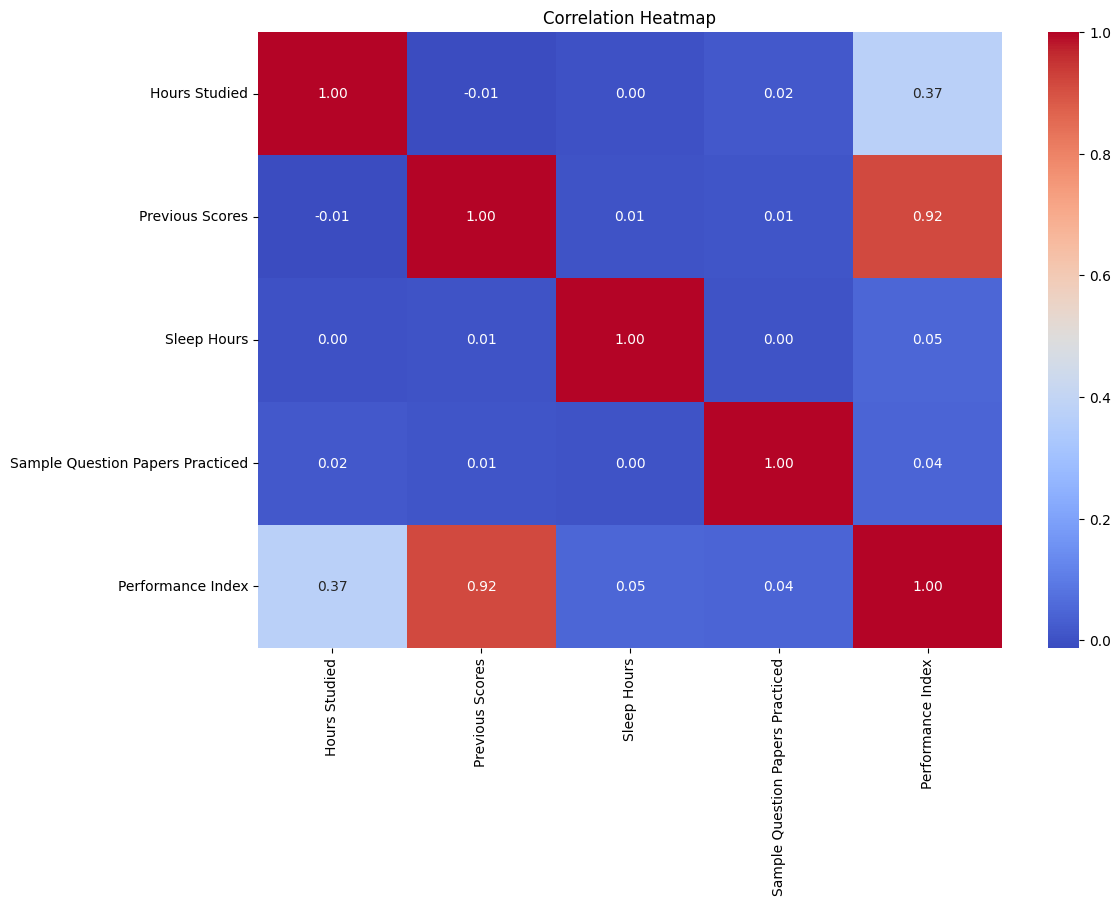

In [58]:
# 7. Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

---

## 2. Data Preprocessing

In [59]:
rename_dict = {
    'Hours Studied': 'Hours_Studied',
    'Previous Scores': 'Previous_Scores',
    'Extracurricular Activities': 'Extracurricular_Activities',
    'Sleep Hours': 'Sleep_Hours',
    'Sample Question Papers Practiced': 'Sample_Question_Papers_Practiced',
    'Performance Index': 'Performance_Index'
}

df.rename(columns=rename_dict, inplace=True)

In [60]:
df.columns

Index(['Hours_Studied', 'Previous_Scores', 'Extracurricular_Activities',
       'Sleep_Hours', 'Sample_Question_Papers_Practiced', 'Performance_Index'],
      dtype='object')

In [61]:
# remove duplicates
df = df.drop_duplicates()

In [62]:
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


In [63]:
# Convert the data type
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].astype('category')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Hours_Studied                     9873 non-null   int64   
 1   Previous_Scores                   9873 non-null   int64   
 2   Extracurricular_Activities        9873 non-null   category
 3   Sleep_Hours                       9873 non-null   int64   
 4   Sample_Question_Papers_Practiced  9873 non-null   int64   
 5   Performance_Index                 9873 non-null   float64 
dtypes: category(1), float64(1), int64(4)
memory usage: 472.6 KB


In [65]:
# One-hot encode 'Extracurricular Activities'
df_encoded = pd.get_dummies(df, columns=['Extracurricular_Activities'], drop_first=False)

In [66]:
# 2. Identify target variable and features
target = 'Performance_Index'
X = df_encoded.drop(target, axis=1)
y = df_encoded[target]

---

## 3. Build the Regression Model

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (7898, 6)
Test shape: (1975, 6)


In [68]:
from sklearn.linear_model import LinearRegression

# 1. Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


---

## 4. Evaluate the Model

In [69]:
from sklearn.metrics import mean_squared_error, r2_score

# 1. Predict on test set
y_pred = model.predict(X_test)

# 2. Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.3f}")

Mean Squared Error (MSE): 4.31
Root Mean Squared Error (RMSE): 2.08
R-squared (R²): 0.988


In [70]:
# make predictions and evaluate
y_pred = model.predict(X_test)
print(f"coefficients: {model.coef_}") # "_" -> private variables
print(f"intercept: {model.intercept_}")
print(f"MSE: {mean_squared_error(y_test, y_pred): .2f}")
print(f"R-Squared: {r2_score(y_test, y_pred): .2f}")

coefficients: [ 2.8510219   1.01843034  0.47207329  0.18870366 -0.28691148  0.28691148]
intercept: -33.69441301266568
MSE:  4.31
R-Squared:  0.99


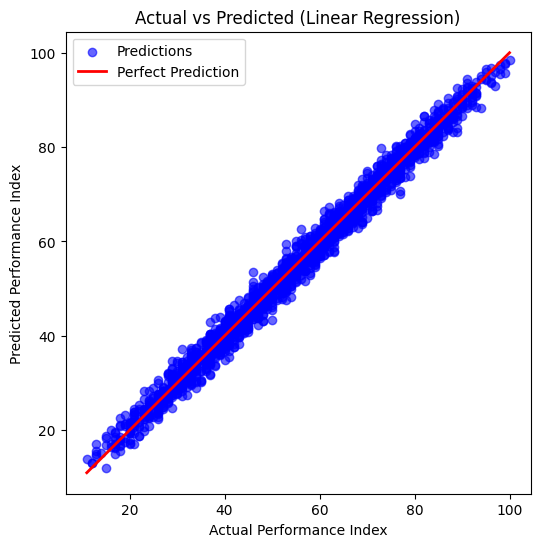

In [71]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue", label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color="red", linewidth=2, label="Perfect Prediction")

plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs Predicted (Linear Regression)")
plt.legend()
plt.show()

## 5. Data Normaliztion

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = scaler.fit_transform(df_encoded)

In [73]:
standardized_data

array([[ 0.77556551,  1.7061685 ,  1.45402483, ...,  1.86297891,
        -1.01007813,  1.01007813],
       [-0.38320542,  0.72491187, -1.49131517, ...,  0.50934786,
         0.99002243, -0.99002243],
       [ 1.16182248, -1.06443844,  0.27588883, ..., -0.53190679,
        -1.01007813,  1.01007813],
       ...,
       [ 0.38930853,  0.78263285,  0.86495683, ...,  0.97791245,
        -1.01007813,  1.01007813],
       [ 1.54807946,  1.59072654,  0.27588883, ...,  2.07122984,
        -1.01007813,  1.01007813],
       [ 0.77556551,  0.26314405,  0.86495683, ...,  0.45728513,
         0.99002243, -0.99002243]])

In [75]:
x_train_s = scaler.fit_transform(X_train)
x_test_s  = scaler.transform(X_test)

In [76]:
model = LinearRegression()
model.fit(x_train_s, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [77]:
y_predictions = model.predict(x_test_s)
y_predictions

array([46.48001281, 80.2853795 , 61.06518835, ..., 77.08443628,
       86.24676576, 35.8793377 ])

In [78]:
mse  = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)

print(f"coefficients: {model.coef_}")   # for normalized features
print(f"intercept: {model.intercept_}")
print(f"MSE: {mse:.2f}")
print(f"r-squared: {r2_score(y_test,y_predictions):.2f}")
print(f"number of features: {model.n_features_in_}")
print(f"RMSE: {rmse:.3f}")

coefficients: [ 7.37331598 17.6199308   0.80213836  0.54005309 -0.14345309  0.14345309]
intercept: 55.095973664218796
MSE: 4.31
r-squared: 0.99
number of features: 6
RMSE: 2.075


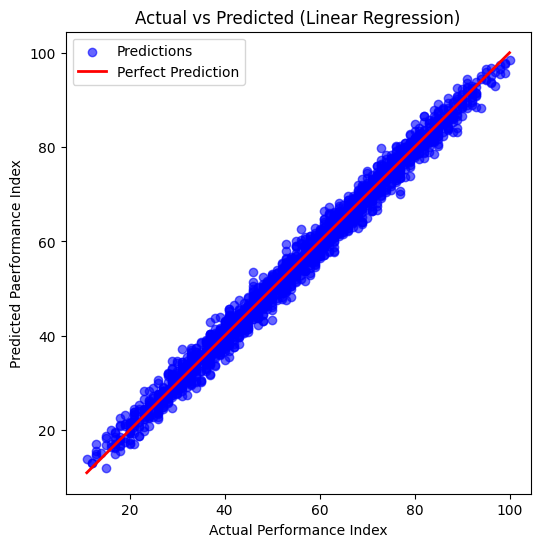

In [79]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_predictions, alpha=0.6, color="blue", label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color="red", linewidth=2, label="Perfect Prediction")

plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Paerformance Index")
plt.title("Actual vs Predicted (Linear Regression)")
plt.legend()
plt.show()

In [80]:
from sklearn.linear_model import SGDRegressor

In [81]:
sgd = SGDRegressor(random_state=42, max_iter=2000, tol=1e-3, penalty="l2", alpha=1e-4)
sgd.fit(x_train_s, y_train)

y_pred_sgd = sgd.predict(x_test_s)
mse  = mean_squared_error(y_test, y_pred_sgd)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred_sgd)

print(f"[SGDRegressor] RMSE: {rmse:.3f} | R^2: {r2:.3f}")

[SGDRegressor] RMSE: 2.078 | R^2: 0.988


In [83]:
for name, coef in zip(X_train.columns, sgd.coef_):
    print(f"{name}: {coef:.4f}")

Hours_Studied: 7.3137
Previous_Scores: 17.6065
Sleep_Hours: 0.8020
Sample_Question_Papers_Practiced: 0.5516
Extracurricular_Activities_No: -0.1345
Extracurricular_Activities_Yes: 0.1345


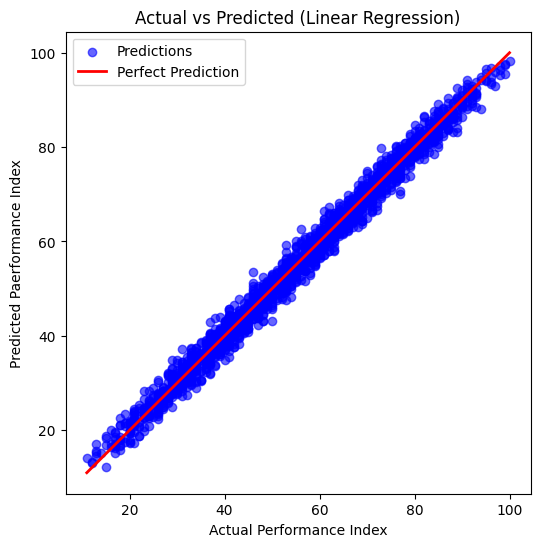

In [84]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_sgd, alpha=0.6, color="blue", label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color="red", linewidth=2, label="Perfect Prediction")

plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Paerformance Index")
plt.title("Actual vs Predicted (Linear Regression)")
plt.legend()
plt.show()